In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
shopping_mall = pd.read_excel('Data_v3.xlsx', sheet_name = 'mall')
hospital = pd.read_excel('Data_v3.xlsx', sheet_name = 'hospital')
hotel = pd.read_excel('Data_v3.xlsx', sheet_name = 'hotel')

In [59]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   place_name          521 non-null    object 
 1   place_ID            521 non-null    object 
 2   latitude            521 non-null    float64
 3   Longitude           521 non-null    float64
 4   plus_code           521 non-null    object 
 5   rating              521 non-null    float64
 6   user_ratings_total  521 non-null    int64  
 7   business_status     521 non-null    object 
 8   types               521 non-null    object 
 9   address             521 non-null    object 
 10  region              520 non-null    object 
 11  num_bus_stop        521 non-null    int64  
 12  num_hospital        521 non-null    int64  
 13  population          450 non-null    float64
dtypes: float64(4), int64(3), object(7)
memory usage: 57.1+ KB


In [60]:
# drop first column
# shopping_mall.drop(columns = ['Unnamed: 0'], inplace = True)
# hospital.drop(columns = ['Unnamed: 0'], inplace = True)
# hotel.drop(columns = ['Unnamed: 0'], inplace = True)

In [61]:
shopping_mall.dropna(inplace=True)
shopping_mall.reset_index(drop=True, inplace=True)
hospital.dropna(inplace=True)
hospital.reset_index(drop=True, inplace=True)
hotel.dropna(inplace=True)
hotel.reset_index(drop=True, inplace=True)

In [62]:
shopping_mall['population']=shopping_mall['population'].astype('int64')
hospital['population']=hospital['population'].astype('int64')
hotel['population']=hotel['population'].astype('int64')

In [63]:
#query_id
qid = {'shopping_mall':0, 'hotel':1, 'hospital':2}

In [64]:
shopping_mall['qid'] = qid['shopping_mall']
hotel['qid'] = qid['hotel']
hospital['qid'] = qid['hospital']

In [65]:
shopping_mall.head()

,Unnamed: 0,place_name,place_ID,latitude,Longitude,plus_code,rating,user_ratings_total,business_status,types,address,num_bus,num_mall,population,qid
0,1,Orchard Towers,ChIJ-z0z0IwZ2jERXjOtNGbV0-0,1.307229,103.829332,8R4H+VP Singapore,3.9,2292,OPERATIONAL,shopping_mall,"400 Orchard Rd, Singapore 238875",1,13,920,0
1,2,Quayside Isle,ChIJ01fgzLUe2jERxlhvImcbZ7g,1.247681,103.842072,6RXR+3R Singapore,4.3,568,OPERATIONAL,shopping_mall,"31 Ocean Way, Singapore 098375",1,0,1480,0
2,3,Coronation Shopping Plaza,ChIJ08duKAYa2jER47-5U4ZdgAo,1.323919,103.809989,8RF5+HX Singapore,3.6,202,OPERATIONAL,shopping_mall,"587 Bukit Timah Rd, Singapore 269707",3,4,74470,0
3,4,Hougang 1,ChIJ0ZkQLVsW2jERY9DgZurtpl8,1.376061,103.879155,9VGH+CM Singapore,3.9,2183,OPERATIONAL,shopping_mall,"1 Hougang Street 91, Singapore 538692",0,0,222310,0
4,5,Greenwich V,ChIJ1-hkimEW2jERyc5cKHfC3Sw,1.387371,103.869407,9VP9+WQ Singapore,3.8,1304,OPERATIONAL,shopping_mall,"1 Seletar Rd, Singapore 807011",0,0,120670,0


In [66]:
shopping_mall['relevance']=0
hotel['relevance']=0
hospital['relevance']=0

In [67]:
shopping_mall['relevance']=shopping_mall['relevance'].astype('float64')
hotel['relevance']=hotel['relevance'].astype('float64')
hospital['relevance']=hospital['relevance'].astype('float64')

In [68]:
# compute relevance
# def compute_relevance(dataframe):
#     for i in range(len(dataframe)):
#         if dataframe['user_ratings_total'][i] >= 100:
#             dataframe['relevance'][i] = dataframe['rating'][i]
#         elif dataframe['user_ratings_total'][i] >= 50:
#             dataframe['relevance'][i] = 0.85*dataframe['rating'][i]
#         else:
#             dataframe['relevance'][i] = 0.7*dataframe['rating'][i]


In [11]:
# def compute_relevance(dataframe):
#     for i in range(len(dataframe)):
#         if dataframe['user_ratings_total'][i] <= 50:
#             if 0 <= dataframe['rating'][i] <= 3.5:
#                 dataframe['relevance'][i] = 0
#             elif 3.5 <= dataframe['rating'][i] <= 4.5:
#                 dataframe['relevance'][i] = 1
#             else:
#                 dataframe['relevance'][i] = 2
#         else:
#             if 0 <= dataframe['rating'][i] <= 2:
#                 dataframe['relevance'][i] = 0
#             elif 2 <= dataframe['rating'][i] <= 4:
#                 dataframe['relevance'][i] = 1
#             else:
#                 dataframe['relevance'][i] = 2

0.0
5.0


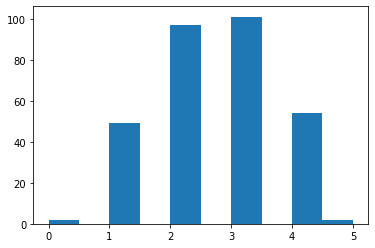

In [69]:
rating = shopping_mall['rating']
users = shopping_mall['user_ratings_total']
relevance = round(np.ceil(np.log(users)*rating)/10)
print(min(relevance))
print(max(relevance))
plt.hist(relevance)
shopping_mall['relevance'] = relevance

In [70]:
type(relevance[0])

numpy.float64

In [71]:
shopping_mall

,Unnamed: 0,place_name,place_ID,latitude,Longitude,plus_code,rating,user_ratings_total,business_status,types,address,num_bus,num_mall,population,qid,relevance
0,1,Orchard Towers,ChIJ-z0z0IwZ2jERXjOtNGbV0-0,1.307229,103.829332,8R4H+VP Singapore,3.9,2292,OPERATIONAL,shopping_mall,"400 Orchard Rd, Singapore 238875",1,13,920,0,3.0
1,2,Quayside Isle,ChIJ01fgzLUe2jERxlhvImcbZ7g,1.247681,103.842072,6RXR+3R Singapore,4.3,568,OPERATIONAL,shopping_mall,"31 Ocean Way, Singapore 098375",1,0,1480,0,3.0
2,3,Coronation Shopping Plaza,ChIJ08duKAYa2jER47-5U4ZdgAo,1.323919,103.809989,8RF5+HX Singapore,3.6,202,OPERATIONAL,shopping_mall,"587 Bukit Timah Rd, Singapore 269707",3,4,74470,0,2.0
3,4,Hougang 1,ChIJ0ZkQLVsW2jERY9DgZurtpl8,1.376061,103.879155,9VGH+CM Singapore,3.9,2183,OPERATIONAL,shopping_mall,"1 Hougang Street 91, Singapore 538692",0,0,222310,0,3.0
4,5,Greenwich V,ChIJ1-hkimEW2jERyc5cKHfC3Sw,1.387371,103.869407,9VP9+WQ Singapore,3.8,1304,OPERATIONAL,shopping_mall,"1 Seletar Rd, Singapore 807011",0,0,120670,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,326,The Atrium,ChIJy4WXYL0Z2jERbg8hQW40fYs,1.299595,103.845817,7RXW+R8 Singapore,4.2,138,OPERATIONAL,shopping_mall,"60A Orchard Rd, Singapore 238890",2,5,380,0,2.0
301,327,Compass One,ChIJy5hMcg8X2jERZ88iA4l4aBY,1.392434,103.895412,9VRW+X5 Singapore,4.1,6943,OPERATIONAL,shopping_mall,"1 Sengkang Square, Singapore 545078",0,1,206680,0,4.0
302,328,Havelock 2,ChIJyQ8DgWIZ2jERJyuRh581sco,1.287184,103.845137,7RPW+V3 Singapore,3.7,138,OPERATIONAL,shopping_mall,"2 Havelock Rd, Singapore 059763",11,12,2720,0,2.0
303,329,KAP Mall,ChIJyWSEZTMX2jERY7_UfsKdFhI,1.336998,103.779553,8QPH+QR Singapore,4.0,72,OPERATIONAL,shopping_mall,"9 King Albert Park, Singapore",0,2,74470,0,2.0


In [12]:
# compute_relevance(shopping_mall)
# compute_relevance(hotel)
# compute_relevance(hospital)

<ipython-input-11-5ac9b8ed2632>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['relevance'][i] = 1
<ipython-input-11-5ac9b8ed2632>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['relevance'][i] = 2
<ipython-input-11-5ac9b8ed2632>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['relevance'][i] = 1
<ipython-input-11-5ac9b8ed2632>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [13]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   place_name          450 non-null    object 
 1   place_ID            450 non-null    object 
 2   latitude            450 non-null    float64
 3   Longitude           450 non-null    float64
 4   plus_code           450 non-null    object 
 5   rating              450 non-null    float64
 6   user_ratings_total  450 non-null    int64  
 7   business_status     450 non-null    object 
 8   types               450 non-null    object 
 9   address             450 non-null    object 
 10  region              450 non-null    object 
 11  num_bus_stop        450 non-null    int64  
 12  num_hospital        450 non-null    int64  
 13  population          450 non-null    int64  
 14  qid                 450 non-null    int64  
 15  relevance           450 non-null    int64  
dtypes: float

In [72]:
shopping_mall = shopping_mall[
    ['relevance', 'qid', 'latitude', 'Longitude', 'population', 'num_bus', 'num_mall']
    ]

In [73]:
hotel = hotel[
    ['relevance', 'qid', 'latitude', 'Longitude', 'population', 'num_bus', 'num_hotel']
    ]

In [74]:
hospital = hospital[
    ['relevance', 'qid', 'latitude', 'Longitude', 'population', 'num_bus_stop', 'num_hospital']
    ]

In [75]:
shopping_mall.rename(columns={'num_mall':'competition', 'Longitude':'longitude'}, inplace=True)
hotel.rename(columns={'num_hotel':'competition','Longitude':'longitude'}, inplace=True)
hospital.rename(columns={'num_hospital':'competition', 'Longitude':'longitude'}, inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [76]:
shopping_mall

,relevance,qid,latitude,longitude,population,num_bus,competition
0,3.0,0,1.307229,103.829332,920,1,13
1,3.0,0,1.247681,103.842072,1480,1,0
2,2.0,0,1.323919,103.809989,74470,3,4
3,3.0,0,1.376061,103.879155,222310,0,0
4,3.0,0,1.387371,103.869407,120670,0,0
...,...,...,...,...,...,...,...
300,2.0,0,1.299595,103.845817,380,2,5
301,4.0,0,1.392434,103.895412,206680,0,1
302,2.0,0,1.287184,103.845137,2720,11,12
303,2.0,0,1.336998,103.779553,74470,0,2


In [77]:
shopping_mall.to_csv('mall2.csv')

In [22]:
# split the dataset into 80:20
# from sklearn.model_selection import train_test_split
# shopping_mall_train, shopping_mall_test = train_test_split(shopping_mall, test_size=0.2)
# hotel_train, hotel_test = train_test_split(hotel, test_size=0.2)
# hospital_train, hospital_test = train_test_split(hospital, test_size=0.2)

In [23]:
# shopping_mall_test

,relevance,qid,latitude,Longitude,population,num_bus,competition
39,3.900,0,1.300395,103.850927,14590,5,13
266,2.870,0,1.292500,103.786428,98050,9,0
156,3.900,0,1.331846,103.946350,289750,0,1
118,4.100,0,1.319882,103.843945,47990,11,5
302,3.700,0,1.287184,103.845137,2720,11,12
...,...,...,...,...,...,...,...
58,3.800,0,1.300602,103.842068,920,6,12
30,3.485,0,1.301502,103.837844,920,11,19
175,4.100,0,1.433502,103.779882,250290,0,0
214,3.900,0,1.324931,103.932381,289750,3,3


In [29]:
# l2r_train = pd.concat([shopping_mall_train, hotel_train, hospital_train])
# l2r_test = pd.concat([shopping_mall_test, hotel_test, hospital_test])

In [31]:
# l2r_test

,relevance,qid,latitude,Longitude,population,num_bus_stop,competition
164,3.80,0,1.301694,103.853284,14590,10,14
213,2.38,0,1.352493,103.943803,261230,0,7
146,1.33,0,1.284078,103.851325,3720,20,9
22,3.90,0,1.348891,103.697630,272660,9,0
121,4.10,0,1.331333,103.948580,289750,0,2
...,...,...,...,...,...,...,...
309,1.89,2,1.309796,103.864179,101210,5,1
210,2.59,2,1.333143,103.878744,124940,0,0
249,1.40,2,1.321230,103.846164,47990,7,19
189,0.00,2,1.379906,103.748276,174330,5,2


In [24]:
# shopping_mall_train = shopping_mall_train.to_numpy()
# shopping_mall_test = shopping_mall_test.to_numpy()


In [26]:
# shopping_mall_train_max = np.max(shopping_mall_train[:,2:], axis = 0)
# shopping_mall_test_max = np.max(shopping_mall_test[:,2:], axis = 0)
# shopping_mall_train_min = np.min(shopping_mall_train[:,2:], axis = 0)
# shopping_mall_test_min = np.min(shopping_mall_test[:,2:], axis = 0)
# shopping_mall_train[:,2:] = (shopping_mall_train[:,2:] - shopping_mall_train_min)/(shopping_mall_train_max - shopping_mall_train_min)
# shopping_mall_test[:,2:] = (shopping_mall_test[:,2:] - shopping_mall_test_min)/(shopping_mall_test_max - shopping_mall_test_min)
# np.save('hotel_train', shopping_mall_train_min_train)
# np.save('hotel_test', shopping_mall_train_min_test)

In [29]:
# shopping_mall_train_max

array([1.45372800e+00, 1.03989759e+02, 2.89750000e+05, 1.70000000e+01,
       2.00000000e+01])

In [32]:
# convert dataframe to numpy
# l2r_train = l2r_train.to_numpy()
# l2r_test = l2r_test.to_numpy()

In [30]:
# print('Size of training set:', shopping_mall_train.shape)
# print('Size of test set:', shopping_mall_test.shape)

Size of training set: (244, 7)
Size of test set: (61, 7)


In [35]:
# l2r_train

array([[3.0100000e+00, 0.0000000e+00, 1.3920241e+00, ..., 2.0668000e+05,
        1.0000000e+01, 1.0000000e+00],
       [3.7000000e+00, 0.0000000e+00, 1.3551225e+00, ..., 2.2231000e+05,
        1.0000000e+01, 0.0000000e+00],
       [3.8000000e+00, 0.0000000e+00, 1.2921679e+00, ..., 2.7200000e+03,
        1.9000000e+01, 1.0000000e+00],
       ...,
       [0.0000000e+00, 2.0000000e+00, 1.3926519e+00, ..., 2.0668000e+05,
        0.0000000e+00, 2.0000000e+00],
       [0.0000000e+00, 2.0000000e+00, 1.2749455e+00, ..., 3.7200000e+03,
        6.0000000e+00, 5.0000000e+00],
       [0.0000000e+00, 2.0000000e+00, 1.3055915e+00, ..., 6.9200000e+03,
        8.0000000e+00, 4.5000000e+01]])

In [36]:
# mean_train = np.mean(l2r_train[:,2:], axis = 0)
# mean_test = np.mean(l2r_test[:,2:], axis = 0)

In [37]:
# std_train = np.std(l2r_train[:,2:], axis = 0)
# std_test = np.std(l2r_test[:,2:], axis = 0)

In [38]:
# normalization
# (value-mean)/std
# l2r_train[:,2:] = (l2r_train[:,2:] - mean_train)/std_train
# l2r_test[:,2:] = (l2r_test[:,2:] - mean_test)/std_test

In [40]:
# l2r_test

array([[ 3.8       ,  0.        , -0.49171326, ..., -0.83012633,
         0.58662579,  0.23611748],
       [ 2.38      ,  0.        ,  0.85375024, ...,  1.98915411,
        -0.96717541, -0.29171212],
       [ 1.33      ,  0.        , -0.95830002, ..., -0.95437859,
         2.140427  , -0.14090367],
       ...,
       [ 1.4       ,  2.        ,  0.02571647, ..., -0.44833924,
         0.12048543,  0.61313863],
       [ 0.        ,  2.        ,  1.57982527, ...,  0.99582185,
        -0.19027481, -0.66873327],
       [ 0.        ,  2.        , -0.13596873, ...,  2.31515913,
        -0.96717541, -0.29171212]])

In [42]:
# l2r_test[:,0]

array([3.8  , 2.38 , 1.33 , 3.9  , 4.1  , 3.9  , 4.   , 3.485, 4.2  ,
       4.   , 2.17 , 3.8  , 2.52 , 2.8  , 4.1  , 2.45 , 4.1  , 4.2  ,
       2.73 , 4.   , 3.7  , 4.3  , 3.315, 4.   , 3.4  , 3.9  , 4.4  ,
       3.9  , 4.2  , 4.2  , 3.29 , 3.7  , 4.   , 3.6  , 4.   , 2.8  ,
       4.3  , 3.9  , 4.2  , 3.4  , 1.19 , 4.3  , 3.8  , 4.2  , 2.87 ,
       3.9  , 3.315, 3.36 , 4.3  , 3.8  , 3.9  , 3.485, 3.5  , 3.8  ,
       3.7  , 3.8  , 4.3  , 3.8  , 4.4  , 3.7  , 2.87 , 4.1  , 4.5  ,
       0.   , 4.5  , 4.6  , 0.   , 3.6  , 4.4  , 4.3  , 3.7  , 2.89 ,
       3.5  , 4.3  , 2.59 , 3.9  , 3.6  , 3.6  , 4.5  , 3.4  , 4.3  ,
       3.1  , 4.   , 2.8  , 2.59 , 2.87 , 3.7  , 4.4  , 2.94 , 0.   ,
       4.4  , 2.52 , 3.8  , 4.6  , 3.6  , 4.6  , 3.9  , 2.87 , 3.7  ,
       0.   , 4.3  , 4.1  , 3.8  , 2.52 , 3.7  , 2.59 , 2.8  , 4.1  ,
       3.7  , 2.59 , 2.66 , 2.31 , 4.4  , 3.4  , 3.485, 2.94 , 3.9  ,
       3.9  , 4.3  , 0.   , 3.8  , 4.3  , 0.   , 4.   , 2.45 , 3.5  ,
       3.9  , 4.4  ,

In [32]:
# save dataset to npy
# np.save('shop_train', shopping_mall_train)
# np.save('shop_test', shopping_mall_test)